In [9]:
!unzip /content/drive/MyDrive/Dataset/IMDB_SENTIMENT.zip

Archive:  /content/drive/MyDrive/Dataset/IMDB_SENTIMENT.zip
  inflating: IMDB Dataset.csv        


In [11]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
import random
from string import punctuation
import pandas as pd

In [12]:
df = pd.read_csv("IMDB Dataset.csv")
df.shape

(50000, 2)

In [13]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
punctuation_str = punctuation
trans_table = str.maketrans("", "", punctuation_str)

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
stop_words = stopwords.words('english')

In [18]:
positive = []
negative = []

for index, row in df.iterrows():
    if row['sentiment'] == 'positive':
        positive.append(row)
    elif row['sentiment'] == 'negative':
        negative.append(row)

In [19]:
negative_document=[]
max_len_neg=0
for ne in negative:
    ne=ne[0]
    tokens = word_tokenize(ne)
    t=str.maketrans("","",punctuation)
    tokens= [ w.translate(t) for w in tokens  ]
    tokens= [ w for w in tokens if w not in stop_words ]
    if len(tokens) > max_len_neg:
      max_len_neg=len(tokens)

    negative_document.append(" ".join(tokens))

print(len(negative_document))

/tmp/ipython-input-1684628552.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ne=ne[0]


25000


In [20]:
positive_document=[]
max_len_pos=0
for pos in positive:
    pos=pos[0]
    tokens = word_tokenize(pos)
    t=str.maketrans("","",punctuation)
    tokens= [ w.translate(t) for w in tokens  ]
    tokens= [ w for w in tokens if w not in stop_words ]
    if len(tokens) > max_len_pos:
      max_len_pos=len(tokens)

    positive_document.append(" ".join(tokens))

print(len(positive_document))

/tmp/ipython-input-3988056002.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos=pos[0]


25000


In [21]:
print("Example positive document:", positive_document[0] if positive_document else "No documents")

Example positive document: One reviewers mentioned watching 1 Oz episode hooked  They right  exactly happened  br    br   The first thing struck Oz brutality unflinching scenes violence  set right word GO  Trust  show faint hearted timid  This show pulls punches regards drugs  sex violence  Its hardcore  classic use word  br    br   It called OZ nickname given Oswald Maximum Security State Penitentary  It focuses mainly Emerald City  experimental section prison cells glass fronts face inwards  privacy high agenda  Em City home many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish  scuffles  death stares  dodgy dealings shady agreements never far away  br    br   I would say main appeal show due fact goes shows would nt dare  Forget pretty pictures painted mainstream audiences  forget charm  forget romance  OZ nt mess around  The first episode I ever saw struck nasty surreal  I could nt say I ready  I watched  I developed taste Oz  got accustomed high levels graphic viol

In [22]:
max_len = max(max_len_neg, max_len_pos)
print(f"Maximum sequence length: {max_len}")

Maximum sequence length: 1824


In [23]:
random.shuffle(positive_document)
random.shuffle(negative_document)

In [24]:
train_data = negative_document[:20000] + positive_document[:20000]
train_y = [0] * 20000 + [1] * 20000

In [25]:
test_data = negative_document[20000:] + positive_document[20000:]
test_y = [0] * 5000 + [1] * 5000

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, MaxPool1D, Dense, Embedding, Flatten, concatenate, Conv1D
from tensorflow.keras.utils import plot_model
import numpy as np
import pickle

In [27]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)

In [28]:
with open("tokenizer.h5", "wb") as f:
    pickle.dump(tokenizer, f)

In [29]:
vocab_len = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_len}")

Vocabulary size: 123278


In [30]:
train_sequences = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding="post", truncating="post")

In [31]:
test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding="post", truncating="post")

In [32]:
input_layer = Input(shape=(max_len,))

In [33]:
emb1 = Embedding(vocab_len, 100, input_length=max_len)(input_layer)
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(emb1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
emb2 = Embedding(vocab_len, 75, input_length=max_len)(input_layer)
conv2 = Conv1D(filters=32, kernel_size=3, activation='relu')(emb2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPool1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

In [35]:
emb3 = Embedding(vocab_len, 50, input_length=max_len)(input_layer)
conv3 = Conv1D(filters=32, kernel_size=3, activation='relu')(emb3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPool1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

In [36]:
emb4 = Embedding(vocab_len, 25, input_length=max_len)(input_layer)
conv4 = Conv1D(filters=32, kernel_size=3, activation='relu')(emb4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPool1D(pool_size=2)(drop4)
flat4 = Flatten()(pool4)

In [37]:
concat = concatenate([flat1, flat2, flat3, flat4])

In [38]:
dense1 = Dense(10, activation='relu')(concat)
output = Dense(1, activation='sigmoid')(dense1)

In [39]:
model = Model(inputs=input_layer, outputs=output)

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1824)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1824, 100) │ 12,327,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1824, 75)  │  9,245,850 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1824, 50)  │  6,163,900 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1824, 25)  │  3,081,950 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1822, 32)  │      9,632 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1822, 32)  │      7,232 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1822, 32)  │      4,832 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 1822, 32)  │      2,432 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1822, 32)  │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1822, 32)  │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1822, 32)  │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 1822, 32)  │          0 │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 911, 32)   │          0 │ dropout[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 911, 32)   │          0 │ dropout_1[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 911, 32)   │          0 │ dropout_2[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 911, 32)   │          0 │ dropout_3[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 29152)     │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 29152)     │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 29152)     │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 32,009,729 (122.11 MB)

 Trainable params: 32,009,729 (122.11 MB)

 Non-trainable params: 0 (0.00 B)

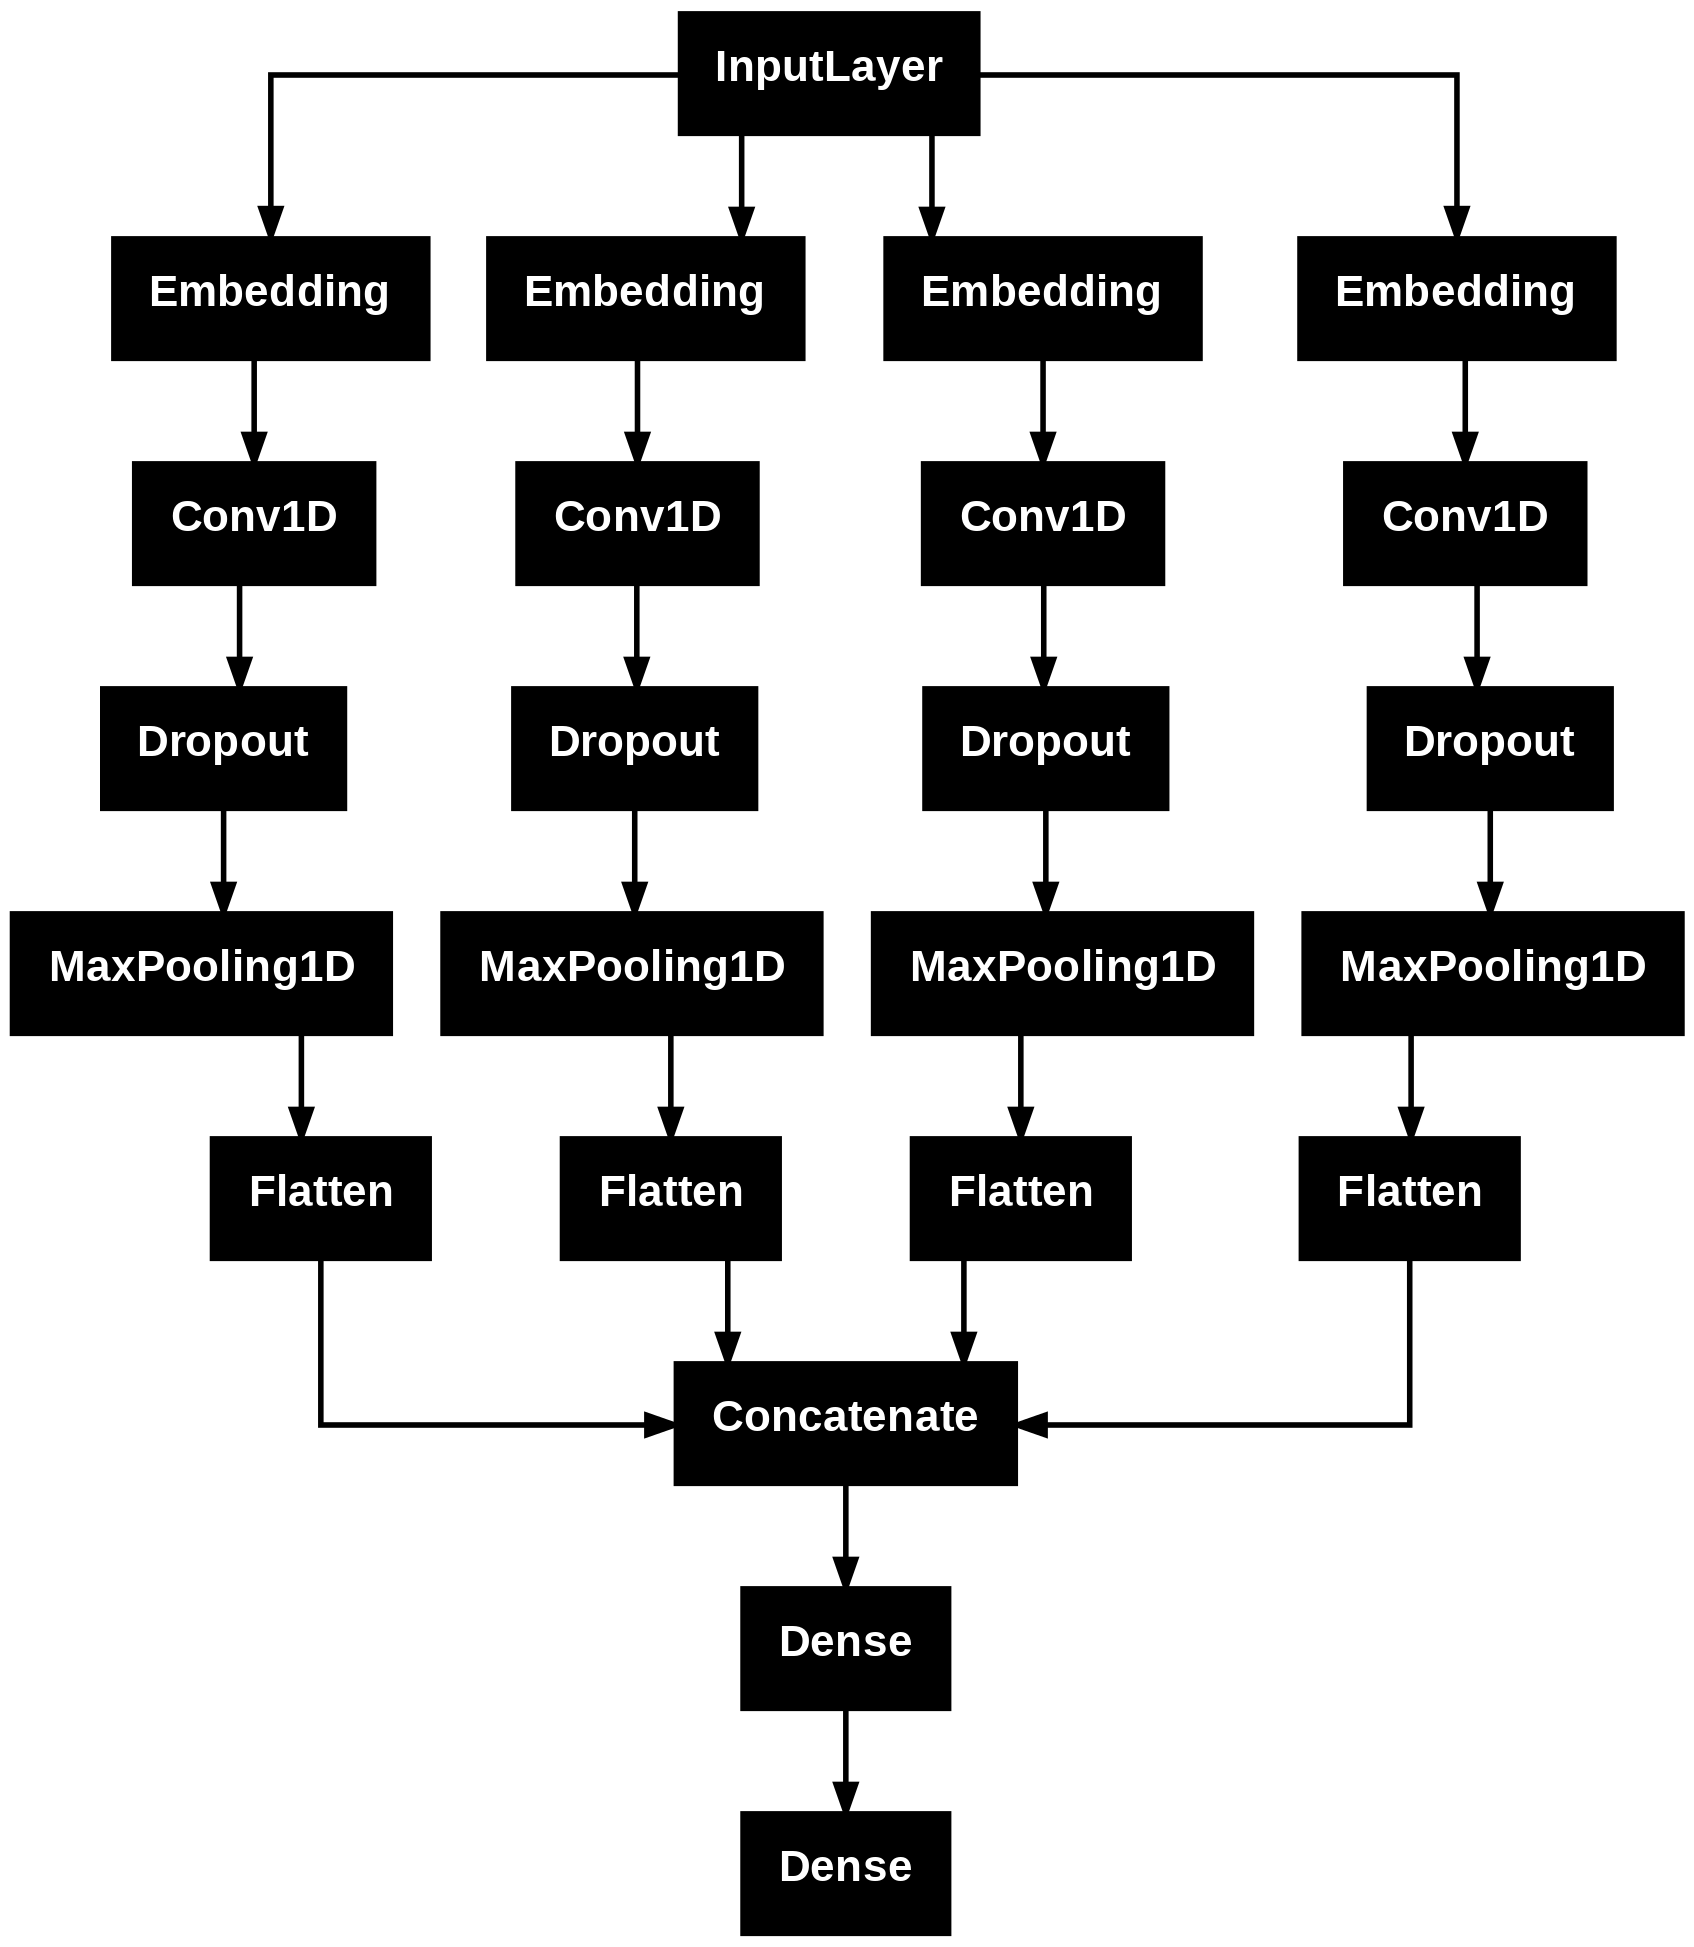

In [43]:
plot_model(model)

In [44]:
history = model.fit(train_padded, np.array(train_y), epochs=10, batch_size=50, validation_data=(test_padded, np.array(test_y)), verbose=1)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.7106 - loss: 0.4934 - val_accuracy: 0.9015 - val_loss: 0.2466
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9555 - loss: 0.1244 - val_accuracy: 0.8968 - val_loss: 0.2548
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9882 - loss: 0.0409 - val_accuracy: 0.8920 - val_loss: 0.3309
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9979 - loss: 0.0094 - val_accuracy: 0.8881 - val_loss: 0.4877
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.8799 - val_loss: 0.5578
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.8881 - val_loss: 0.5246
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.8825 - val_loss: 0.5612
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9988 - loss: 0.0039 - 

In [45]:
model.save("multi_channel_sentiment_model.h5")

In [46]:
loss, accuracy = model.evaluate(test_padded, np.array(test_y))
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9013 - loss: 0.5951
Test Loss: 0.714316189289093
Test Accuracy: 0.8810999989509583


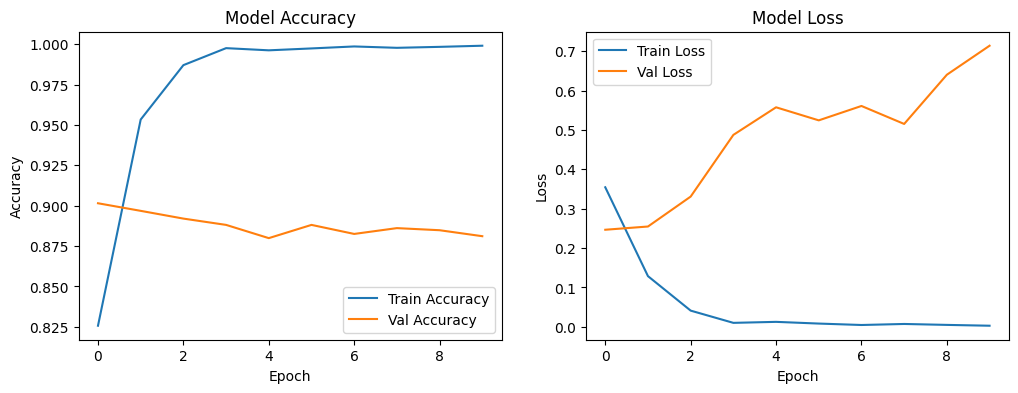

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()